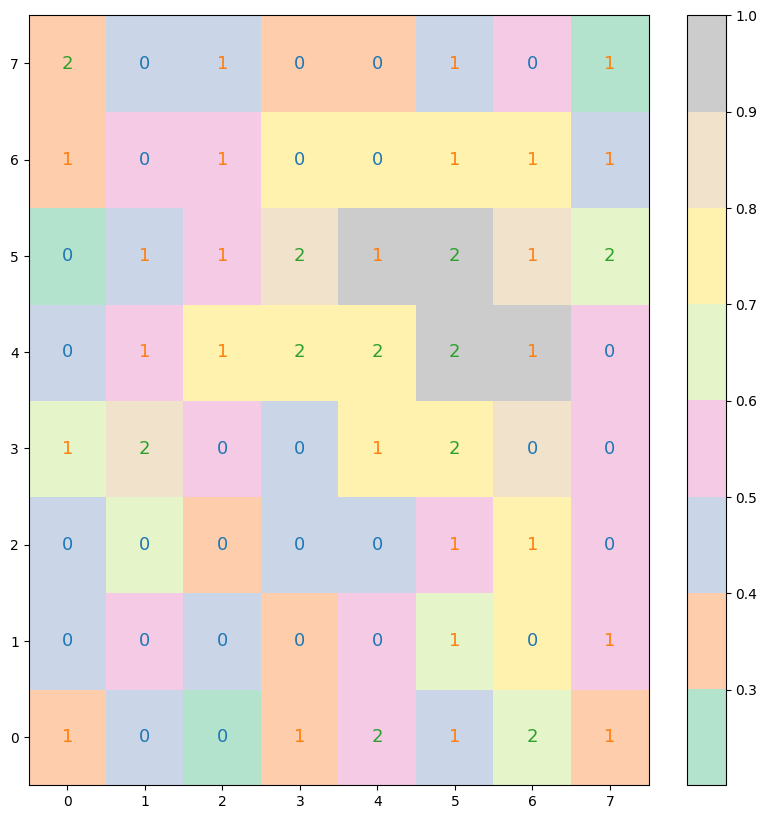

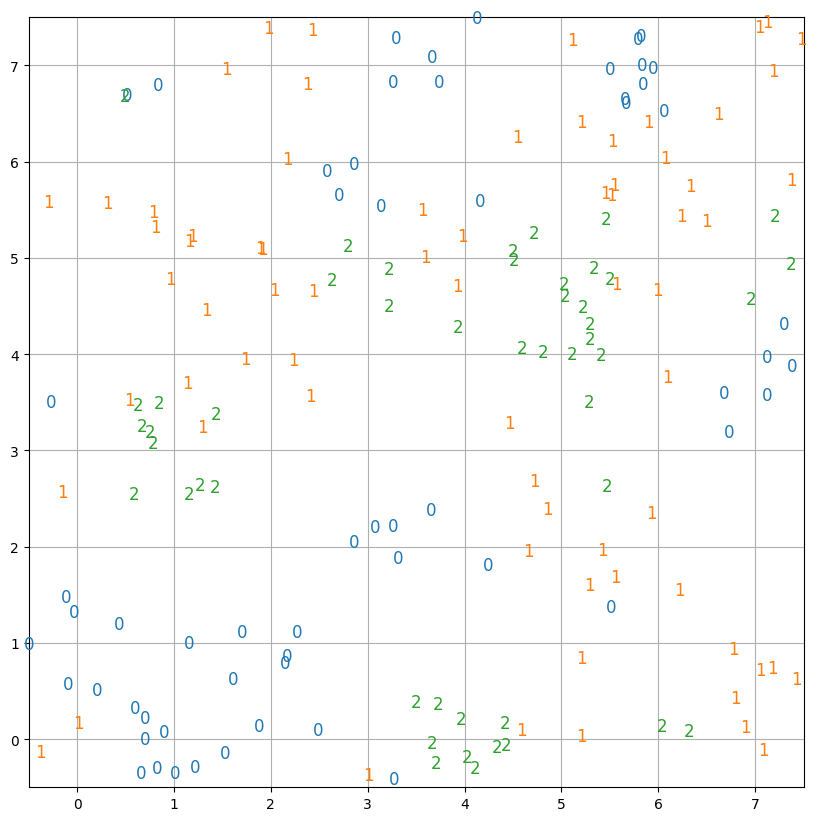

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

# Carga el conjunto de datos y realiza la preparación de los datos
vinhos = pd.read_csv('wine.csv')
x = vinhos.iloc[:, 1:].values
y = vinhos.iloc[:, 0].values
normalizador = MinMaxScaler(feature_range=(0, 1))
x = normalizador.fit_transform(x)

# Crea e entrena el SOM
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

# Mapeo de activación
q = som.activation_response(x)

# Mapeo de clases
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

# Gráfico mejorado del SOM
winners = np.array([som.winner(x) for x in x])
grid_size = som.get_weights().shape

# Crear una matriz para almacenar las etiquetas de clase correspondientes a las neuronas ganadoras
class_labels = np.zeros((grid_size[0], grid_size[1]), dtype=int)

for i, (x_, y_) in enumerate(winners):
    class_labels[x_, y_] = y[i]

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='Pastel2')  # Mapa de distancia
plt.colorbar()

# Etiquetar cada neurona con su clase correspondiente
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        plt.text(i + 0.5, j + 0.5, str(class_labels[i, j]),
                 color='C' + str(class_labels[i, j]),
                 fontsize=13, ha='center', va='center')

plt.xticks(np.arange(0.5, grid_size[0], 1), range(grid_size[0]))
plt.yticks(np.arange(0.5, grid_size[1], 1), range(grid_size[1]))

plt.show()

plt.figure(figsize=(10, 10))
for i in range(len(x)):
    plt.text(winners[i][0] + np.random.rand(), winners[i][1] + np.random.rand(), str(y[i]),
             color='C' + str(y[i]), fontsize=12, ha='center', va='center')

plt.xlim(0, grid_size[0])
plt.ylim(0, grid_size[1])
plt.xticks(np.arange(0.5, grid_size[0], 1), range(grid_size[0]))
plt.yticks(np.arange(0.5, grid_size[1], 1), range(grid_size[1]))
plt.grid()
plt.show()



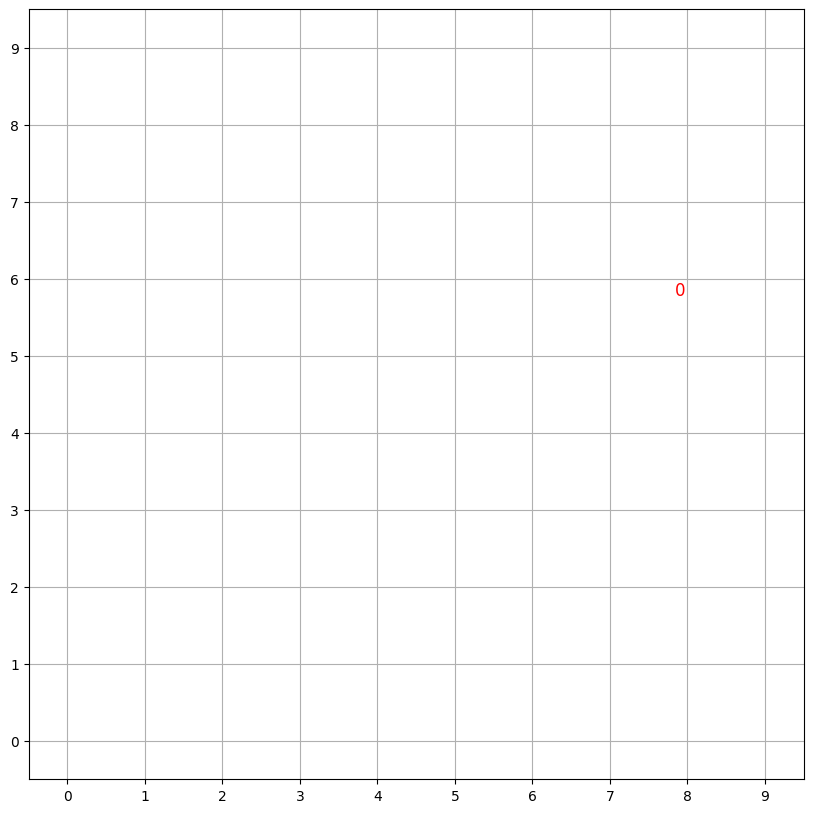

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Hiperparámetros del algoritmo
tasa_aprendizaje = 0.4
num_epocas = 100
num_neuronas_x = 10
num_neuronas_y = 10
num_caracteristicas = 13

# Carga los datos de vinos desde un archivo CSV
data = pd.read_csv('wine.csv')
# Convierte los datos a un arreglo NumPy
datos = data.iloc[:, 1:].to_numpy()  # Excluye la primera columna de tipos de vino

# Escala los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
datos = scaler.fit_transform(datos)

# Inicializa el mapa autoorganizativo
mapa = np.random.rand(num_neuronas_x, num_neuronas_y, num_caracteristicas)

winners = []  # Almacenar las coordenadas de las neuronas ganadoras
y = data.iloc[:, 0] - 1
 # Etiquetas de los vinos

# Entrenamiento
for epoca in range(num_epocas):
    for punto in datos:
        # Calcular la neurona ganadora (la más cercana)
        diferencias = mapa - punto
        distancias = np.sum(diferencias ** 2, axis=2)
        neurona_ganadora = np.unravel_index(np.argmin(distancias), distancias.shape)
        # Actualizar los pesos de la neurona ganadora
        mapa[neurona_ganadora] += tasa_aprendizaje * (punto - mapa[neurona_ganadora])
        
        winners.append(neurona_ganadora)

# Convierte las coordenadas de las neuronas ganadoras en un arreglo NumPy
winners = np.array(winners)

# Gráfica de los resultados
plt.figure(figsize=(10, 10))
colores = ['r', 'b', 'g']  # Especifica colores para cada categoría
plt.text(winners[i][0] + np.random.rand(), winners[i][1] + np.random.rand(), str(y[i]),
         color=colores[int(y[i])], fontsize=12, ha='center', va='center')

grid_size = (num_neuronas_x, num_neuronas_y)
plt.xlim(0, grid_size[0])
plt.ylim(0, grid_size[1])
plt.xticks(np.arange(0.5, grid_size[0], 1), range(grid_size[0]))
plt.yticks(np.arange(0.5, grid_size[1], 1), range(grid_size[1]))
plt.grid()
plt.show()


training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.12848609857778193
quantization...
building new image...
done.


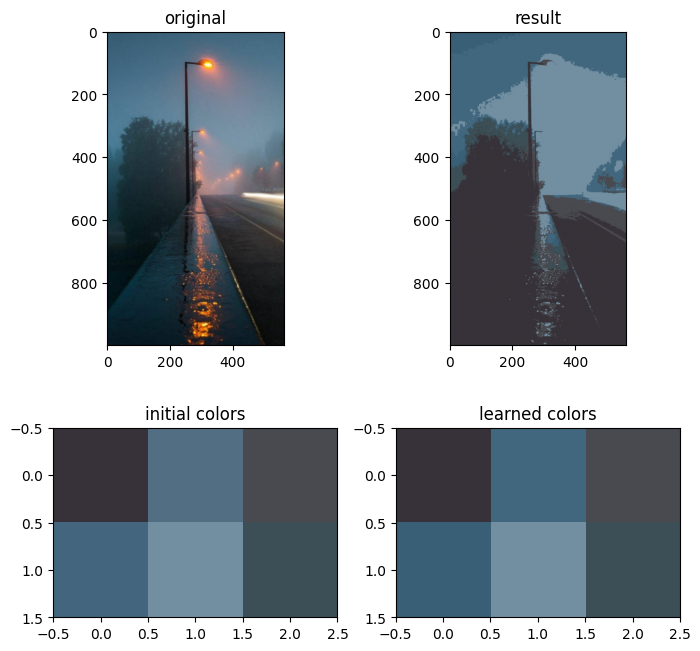

In [4]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('rain.jpeg')

pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

print('training...')
som = MiniSom(2, 3, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels) 
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
print('done.')


plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()